## Scope of the Study

In a NHS, when

## Data Processing

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### EDA

In [ ]:
Data_train=pd.read_csv('/content/drive/MyDrive/ITC_DS/Assignments/Week2_Classification/MNIST_train.csv')
Data_test=pd.read_csv('/content/drive/MyDrive/ITC_DS/Assignments/Week2_Classification/MNIST_Test.csv')
print(Data_train.columns)

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)


In [ ]:
# Removing the unwanted columns.
Data_train=Data_train.drop(['Unnamed: 0', 'index'],axis=1)
Data_test=Data_test.drop(['Unnamed: 0', 'index'],axis=1)

In [ ]:
# Descrptive Analysis
NullValues_TrainSet=Data_train.isna().sum()
NullValues_TestSet=Data_test.isna().sum()

In [ ]:
# Dataframe to array
X_train=Data_train.to_numpy()
y_train=X_train[:,0]
X_train=X_train[:,1:]

X_test=Data_test.to_numpy()
y_test=X_test[:,0]
X_test=X_test[:,1:]

In [ ]:
# Normalized the X data
X_train_Normalized=X_train/255
X_test_Normalized=X_test/255

In [ ]:
# Binarize the X data
X_train_Binarize=X_train.copy()
X_train_Binarize[X_train>=215]=1
X_train_Binarize[X_train<215]=0

X_test_Binarize=X_test.copy()
X_test_Binarize[X_test>=215]=1
X_test_Binarize[X_test<215]=0

### Data report

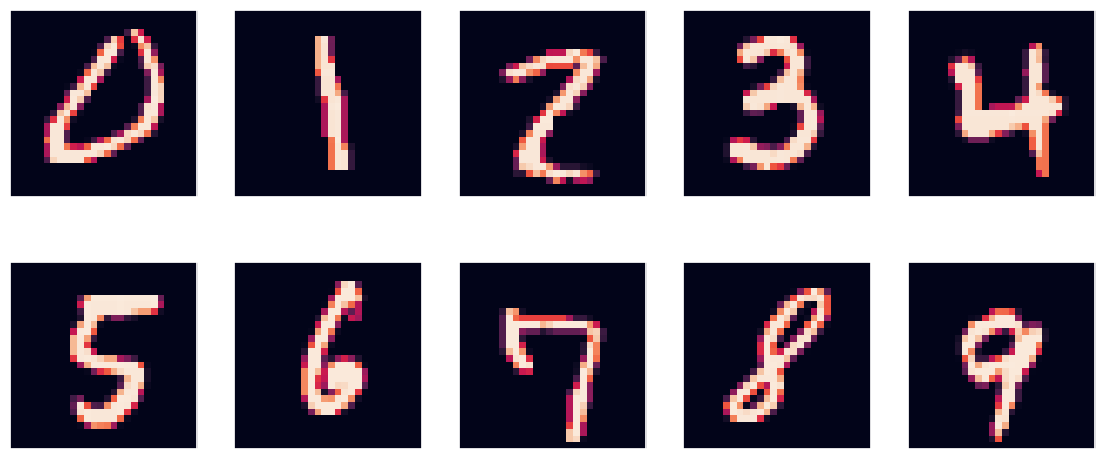

In [ ]:
#Plotting
plt.figure(figsize=(14,6))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    No=np.where(y_train == i-1)[0][3100]
    X_train_pic=X_train[No,:].reshape((28,28))
    plt.imshow(X_train_pic)
    plt.xticks([])
    plt.yticks([])

([], [])

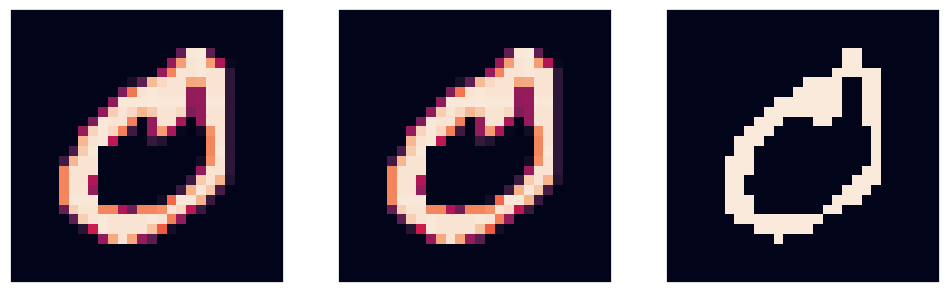

In [ ]:
#Plotting
plt.figure(figsize=(12,4))
X_train_pic=X_train[21,:].reshape((28,28))
X_train_Normalized_pic=X_train_Normalized[21,:].reshape((28,28))
X_train_Binarized_pic=X_train_Binarize[21,:].reshape((28,28))

plt.subplot(1, 3, 1)
plt.imshow(X_train_pic)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(X_train_Normalized_pic)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(X_train_Binarized_pic)
plt.xticks([])
plt.yticks([])

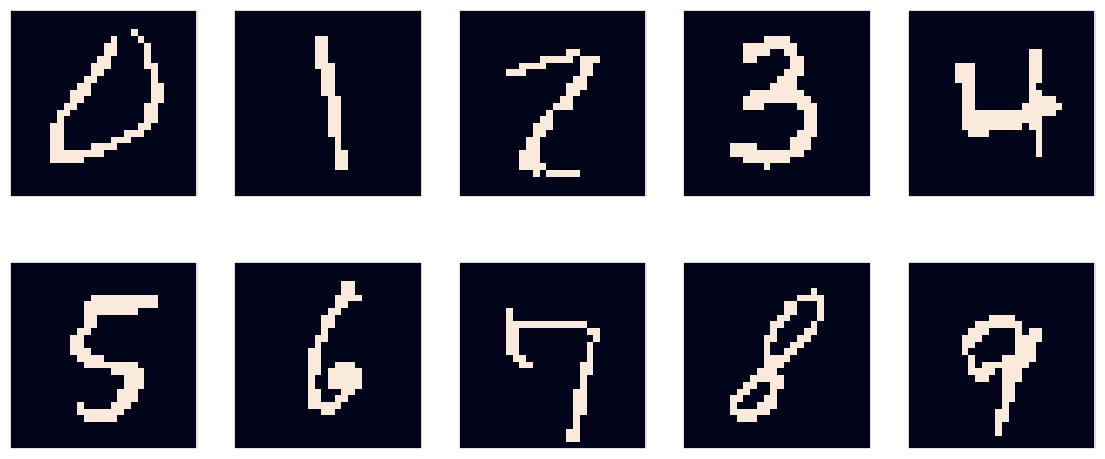

In [ ]:
#Plotting
plt.figure(figsize=(14,6))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    No=np.where(y_train == i-1)[0][3100]
    X_train_Binarized_pic=X_train_Binarize[No,:].reshape((28,28))
    plt.imshow(X_train_Binarized_pic)
    plt.xticks([])
    plt.yticks([])

## Naive Bayes Classification

## Naive Bayes Model

In [ ]:
class NaiveBayes():

  def fit(self,X,y,epsilon=1e-3):

    # define the parameters
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))

    # Run through the data
    for k in self.K:
      X_k=X[y==k,:]

      self.likelihoods[k]={'mean':X_k.mean(axis=0),
                           'cov':X_k.var(axis=0)+epsilon}
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):
    N,D=X.shape # N os no of rows, D no features
    P_hat=np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

  def accuracy(self,y,y_hat):
    return round(np.mean(y==y_hat)*100,1)

  def ConfusionMatrix(self,y,y_hat):
    y_actu = pd.Series(y, name='Actual')
    y_pred = pd.Series(y_hat, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    return df_confusion

### Run the Model

In [ ]:
nb_v1=NaiveBayes()
nb_v1.fit(X_train,y_train)
y_train_O_nb_hat=nb_v1.predict(X_train)
y_test_O_nb_hat=nb_v1.predict(X_test)

print('Training data accuracy : '+str(nb_v1.accuracy(y_train,y_train_O_nb_hat)))
print('Testing data accuracy : '+str(nb_v1.accuracy(y_test,y_test_O_nb_hat)))

Training data accuracy : 59.4
Testing data accuracy : 58.8


In [ ]:
nb_v2=NaiveBayes()
nb_v2.fit(X_train_Normalized,y_train)
y_train_N_nb_hat=nb_v2.predict(X_train_Normalized)
y_test_N_nb_hat=nb_v2.predict(X_test_Normalized)

print('Training data accuracy : '+str(nb_v2.accuracy(y_train,y_train_N_nb_hat)))
print('Testing data accuracy : '+str(nb_v2.accuracy(y_test,y_test_N_nb_hat)))

Training data accuracy : 76.8
Testing data accuracy : 77.5


In [ ]:
nb_v3=NaiveBayes()
nb_v3.fit(X_train_Binarize,y_train)
y_train_B_nb_hat=nb_v3.predict(X_train_Binarize)
y_test_B_nb_hat=nb_v3.predict(X_test_Binarize)

print('Training data accuracy : '+str(nb_v3.accuracy(y_train,y_train_B_nb_hat)))
print('Testing data accuracy : '+str(nb_v3.accuracy(y_test,y_test_B_nb_hat)))

Training data accuracy : 74.5
Testing data accuracy : 75.6


### Plotting outcomes

<Axes: xlabel='Predicted', ylabel='Actual'>

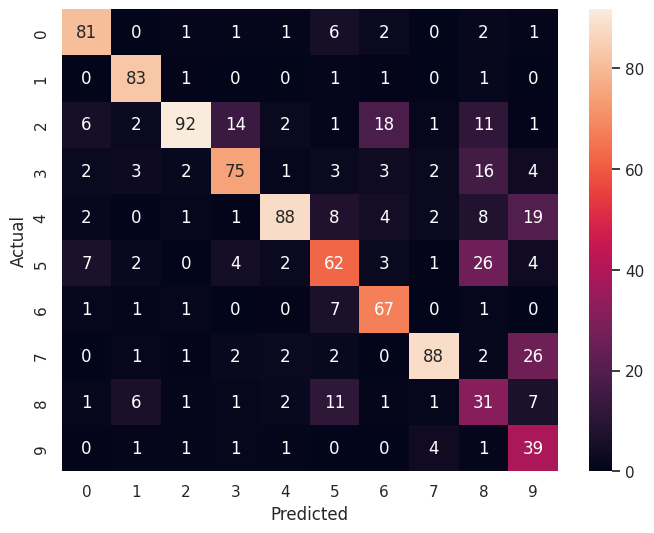

In [ ]:
nb_v1.ConfusionMatrix(y_test,y_test_O_nb_hat)
nb_v1_confusionMatrix=nb_v1.ConfusionMatrix(y_test,y_test_O_nb_hat)
for i in range(10):
  nb_v1_confusionMatrix.iloc[:,i]=nb_v1_confusionMatrix.iloc[:,i]/sum(nb_v1_confusionMatrix.iloc[:,i])*100

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(nb_v1_confusionMatrix,annot=True,fmt=".0f")

In [ ]:
nb_v2.ConfusionMatrix(y_test,y_test_N_nb_hat)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,887,0,6,3,4,8,23,1,44,4
1,0,1087,3,5,0,1,7,0,31,1
2,19,21,690,45,10,4,92,8,135,8
3,10,32,23,766,3,17,23,16,63,57
4,6,3,9,3,559,10,32,6,34,320
5,26,20,9,89,24,467,23,8,174,52
6,9,12,13,2,3,18,879,0,21,1
7,0,17,9,8,21,1,3,779,28,162
8,8,68,10,26,15,26,8,6,721,86


In [ ]:
nb_v3.ConfusionMatrix(y_test,y_test_B_nb_hat)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,872,1,4,2,3,7,27,1,56,7
1,0,1090,3,6,0,1,7,0,28,0
2,18,26,668,47,8,2,89,11,154,9
3,8,38,27,750,2,17,24,13,70,61
4,9,7,9,5,511,10,29,6,32,364
5,28,26,9,69,25,408,29,11,213,74
6,9,17,13,1,2,17,877,1,20,1
7,0,23,7,8,18,1,4,767,28,172
8,6,73,9,20,16,23,12,3,710,102


## Gaussian Bayes Model

In [ ]:
class GaussianBayes():

  def fit(self,X,y,epsilon=1e-3):
    # define the parameters
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))

    # run through the data
    for k in self.K:
      X_k=X[y==k,:]
      N_k,D=X_k.shape
      mu_k=X_k.mean(axis=0)

      self.likelihoods[k]={'mean':X_k.mean(axis=0),
                           'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      # The numpy. matmul() function returns the matrix product of two arrays. While it returns a normal product for 2-D arrays,
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):
    N,D=X.shape
    P_hat=np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

  def accuracy(self,y,y_hat):
    return round(np.mean(y==y_hat)*100,1)

  def ConfusionMatrix(self,y,y_hat):
    y_actu = pd.Series(y, name='Actual')
    y_pred = pd.Series(y_hat, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    return df_confusion

### Run the Model

In [ ]:
gb_v1=GaussianBayes()
gb_v1.fit(X_train,y_train)
y_train_gb_hat=gb_v1.predict(X_train)
y_test_O_gb_hat=gb_v1.predict(X_test)

In [ ]:
print('Training data accuracy : '+str(gb_v1.accuracy(y_train,y_train_gb_hat)))
print('Testing data accuracy : '+str(gb_v1.accuracy(y_test,y_test_O_gb_hat)))

Training data accuracy : 78.6
Testing data accuracy : 75.3


In [ ]:
gb_v2=GaussianBayes()
gb_v2.fit(X_train_Normalized,y_train)
y_train_N_gb_hat=gb_v2.predict(X_train_Normalized)
y_test_N_gb_hat=gb_v2.predict(X_test_Normalized)

In [ ]:
print('Training data accuracy : '+str(gb_v2.accuracy(y_train,y_train_N_gb_hat)))
print('Testing data accuracy : '+str(gb_v2.accuracy(y_test,y_test_N_gb_hat)))

Training data accuracy : 93.1
Testing data accuracy : 91.1


In [ ]:
gb_v3=GaussianBayes()
gb_v3.fit(X_train_Binarize,y_train)
y_train_B_gb_hat=gb_v3.predict(X_train_Binarize)
y_test_B_gb_hat=gb_v3.predict(X_test_Binarize)

In [ ]:
print('Training data accuracy : '+str(gb_v3.accuracy(y_train,y_train_B_gb_hat)))
print('Testing data accuracy : '+str(gb_v3.accuracy(y_test,y_test_B_gb_hat)))

Training data accuracy : 88.7
Testing data accuracy : 86.4


### Plotting

<Axes: xlabel='Predicted', ylabel='Actual'>

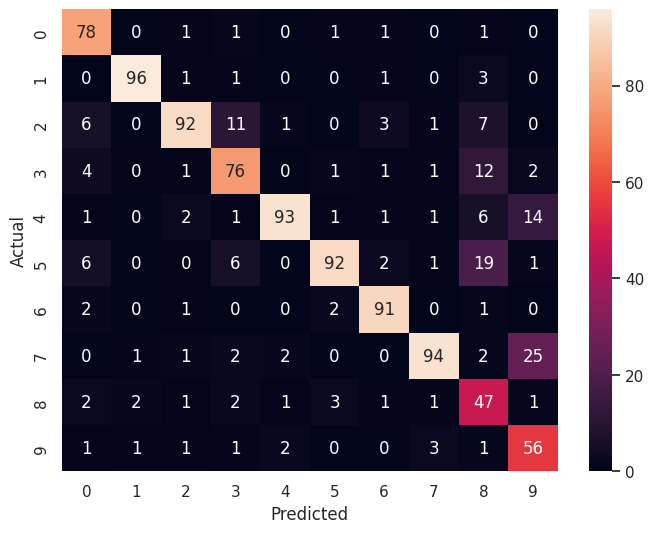

In [ ]:
bg_v1_confusionMatrix=gb_v1.ConfusionMatrix(y_test,y_test_O_gb_hat)
for i in range(10):
  bg_v1_confusionMatrix.iloc[:,i]=bg_v1_confusionMatrix.iloc[:,i]/sum(bg_v1_confusionMatrix.iloc[:,i])*100

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(bg_v1_confusionMatrix,annot=True,fmt=".0f")

<Axes: xlabel='Predicted', ylabel='Actual'>

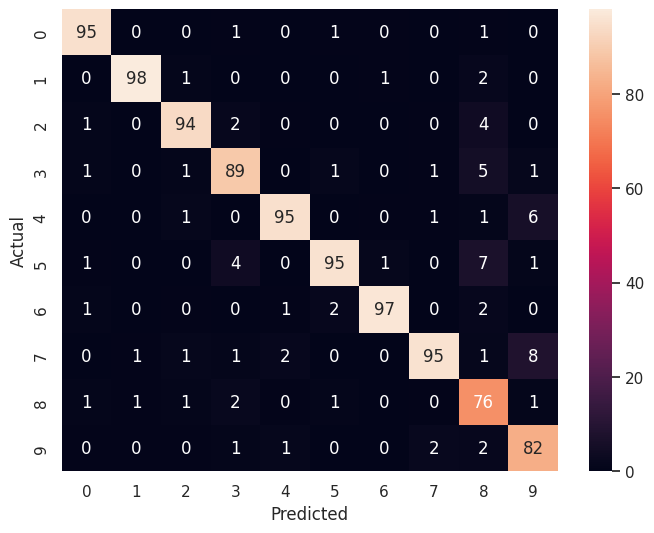

In [ ]:
bg_v2_confusionMatrix=gb_v2.ConfusionMatrix(y_test,y_test_N_gb_hat)
for i in range(10):
  bg_v2_confusionMatrix.iloc[:,i]=bg_v2_confusionMatrix.iloc[:,i]/sum(bg_v2_confusionMatrix.iloc[:,i])*100

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(bg_v2_confusionMatrix,annot=True,fmt=".0f")

<Axes: xlabel='Predicted', ylabel='Actual'>

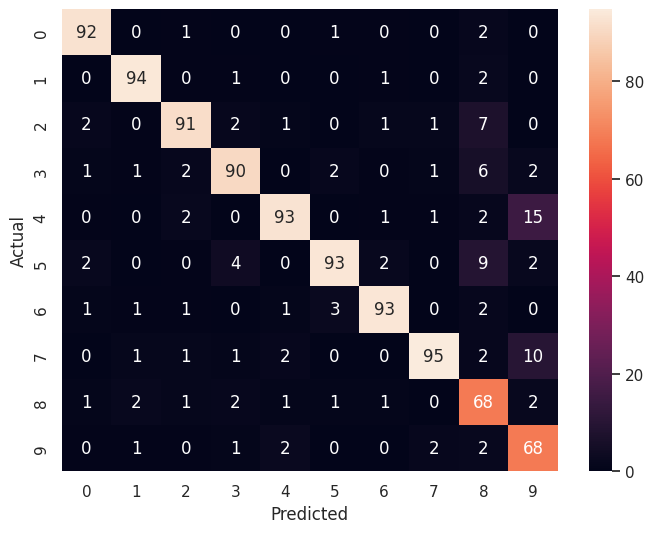

In [ ]:
bg_v3_confusionMatrix=gb_v3.ConfusionMatrix(y_test,y_test_B_gb_hat)
for i in range(10):
  bg_v3_confusionMatrix.iloc[:,i]=bg_v3_confusionMatrix.iloc[:,i]/sum(bg_v3_confusionMatrix.iloc[:,i])*100

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(bg_v3_confusionMatrix,annot=True,fmt=".0f")

In [ ]:
gb_Parameters=[]
for i in range(1,30):
  gb_v2=GaussianBayes()
  gb_v2.fit(X_train_Normalized,y_train,epsilon=i*1e-3)
  y_train_N_gb_hat=gb_v2.predict(X_train_Normalized)
  y_test_N_gb_hat=gb_v2.predict(X_test_Normalized)

  gb_Parameters.append([i*1e-3,
                        gb_v2.accuracy(y_train,y_train_N_gb_hat),
                        gb_v2.accuracy(y_test,y_test_N_gb_hat)])
  print(i)

  print('Training data accuracy : '+str(gb_v2.accuracy(y_train,y_train_N_gb_hat)))
  print('Testing data accuracy : '+str(gb_v2.accuracy(y_test,y_test_N_gb_hat)))

1
Training data accuracy : 93.1
Testing data accuracy : 91.1
2
Training data accuracy : 94.0
Testing data accuracy : 92.4
3
Training data accuracy : 94.5
Testing data accuracy : 93.1
4
Training data accuracy : 94.8
Testing data accuracy : 93.6
5
Training data accuracy : 95.0
Testing data accuracy : 93.8
6
Training data accuracy : 95.2
Testing data accuracy : 94.0
7
Training data accuracy : 95.3
Testing data accuracy : 94.2
8
Training data accuracy : 95.4
Testing data accuracy : 94.4
9
Training data accuracy : 95.5
Testing data accuracy : 94.6
10
Training data accuracy : 95.6
Testing data accuracy : 94.7
11
Training data accuracy : 95.6
Testing data accuracy : 94.8
12
Training data accuracy : 95.7
Testing data accuracy : 94.9
13
Training data accuracy : 95.7
Testing data accuracy : 95.0
14
Training data accuracy : 95.7
Testing data accuracy : 95.1
15
Training data accuracy : 95.8
Testing data accuracy : 95.1
16
Training data accuracy : 95.8
Testing data accuracy : 95.2
17
Training data 

<class 'list'>


(90.0, 97.0)

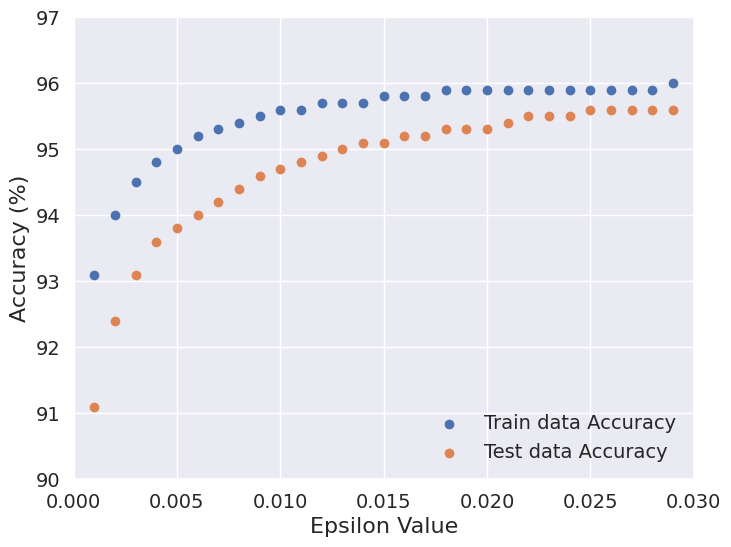

In [ ]:
SmoothingFactor=[i[0] for i in gb_Parameters]
TrainingDataModelAccuracy=[i[1] for i in gb_Parameters]
TestingDataModelAccuracy=[i[2] for i in gb_Parameters]
print(type(gb_Parameters))

plt.figure(figsize=(8,6))
plt.scatter(SmoothingFactor, TrainingDataModelAccuracy, label='Train data Accuracy')
plt.scatter(SmoothingFactor, TestingDataModelAccuracy, label='Test data Accuracy')
plt.legend(fontsize=14,loc=4,frameon=False)
plt.xlabel('Epsilon Value',fontsize=16)
plt.ylabel('Accuracy (%)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,3e-2])
plt.ylim([90,97])

In [ ]:
gb_v4=GaussianBayes()
gb_v4.fit(X_train_Normalized,y_train,epsilon=i*25e-3)
y_train_gb_hat_final=gb_v4.predict(X_train_Normalized)
y_test_gb_hat_final=gb_v4.predict(X_test_Normalized)

print('Training data accuracy : '+str(gb_v4.accuracy(y_train,y_train_gb_hat_final)))
print('Testing data accuracy : '+str(gb_v4.accuracy(y_test,y_test_gb_hat_final)))
bg_v4_confusionMatrix=gb_v4.ConfusionMatrix(y_test,y_test_gb_hat_final)

<Axes: xlabel='Predicted', ylabel='Actual'>

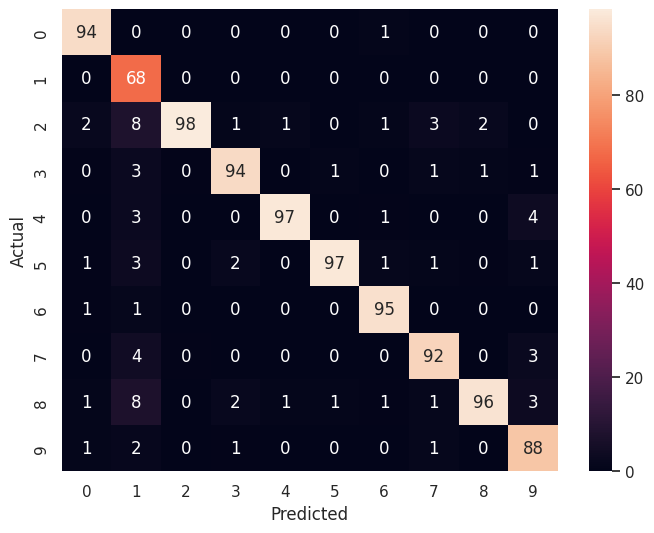

In [ ]:
for i in range(10):
  bg_v4_confusionMatrix.iloc[:,i]=bg_v4_confusionMatrix.iloc[:,i]/sum(bg_v4_confusionMatrix.iloc[:,i])*100

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(bg_v4_confusionMatrix,annot=True,fmt=".0f")